In [1]:
import anndata, pickle, os, fnmatch, math, random
import scipy.stats as stats
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib as mlp
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
from matplotlib.colors import ListedColormap
from matplotlib.ticker import MultipleLocator, LogLocator, LogFormatter, LogFormatterSciNotation, MaxNLocator
import matplotlib.patches as mpatches

In [79]:
'''ADDING PLOTTING PARAMETERS SO EXPORTED IMAGES ARE COMPATIBLE WITH ILLUSTRATOR'''

# Code from: https://jonathansoma.com/lede/data-studio/matplotlib/exporting-from-matplotlib-to-open-in-adobe-illustrator/
mlp.rcParams['pdf.fonttype'] = 42
mlp.rcParams['ps.fonttype'] = 42

In [2]:
'''IMPORTING NECESSARY FUNCTIONS FROM GENERAL FUNCTION FILE'''

%run GeneralFunctions.ipynb

In [3]:
directory = 'F:/scanpy_mouse_FINAL_DATA.h5ad'
adata = sc.read_h5ad(directory)

In [4]:
vcLst = []

for name in sampleNameLst:
    if 'VC' in name: 
        vcLst.append(name)

sampleObj = adata[adata.obs['sample'].isin(vcLst),:]

# PCA
sc.tl.pca(sampleObj, svd_solver='arpack')

# Neighbors and UMAP Computations
sc.pp.neighbors(sampleObj, n_neighbors=50, n_pcs =50, use_rep = "Scanorama")
sc.tl.umap(sampleObj) 

# Re-calculating cluster numbers 
sc.tl.leiden(sampleObj, resolution = 0.3, key_added = "leiden_0.3")

# Calculates nuclei and gene information specific to the sample object 
sc.pp.calculate_qc_metrics(sampleObj, percent_top=None, log1p=False, inplace=True)

C:\Users\Hlab\AppData\Local\Programs\Python\Python310\lib\site-packages\scanpy\preprocessing\_pca.py:229: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata.obsm['X_pca'] = X_pca


C:\Users\Hlab\AppData\Local\Programs\Python\Python310\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
C:\Users\Hlab\AppData\Local\Programs\Python\Python310\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


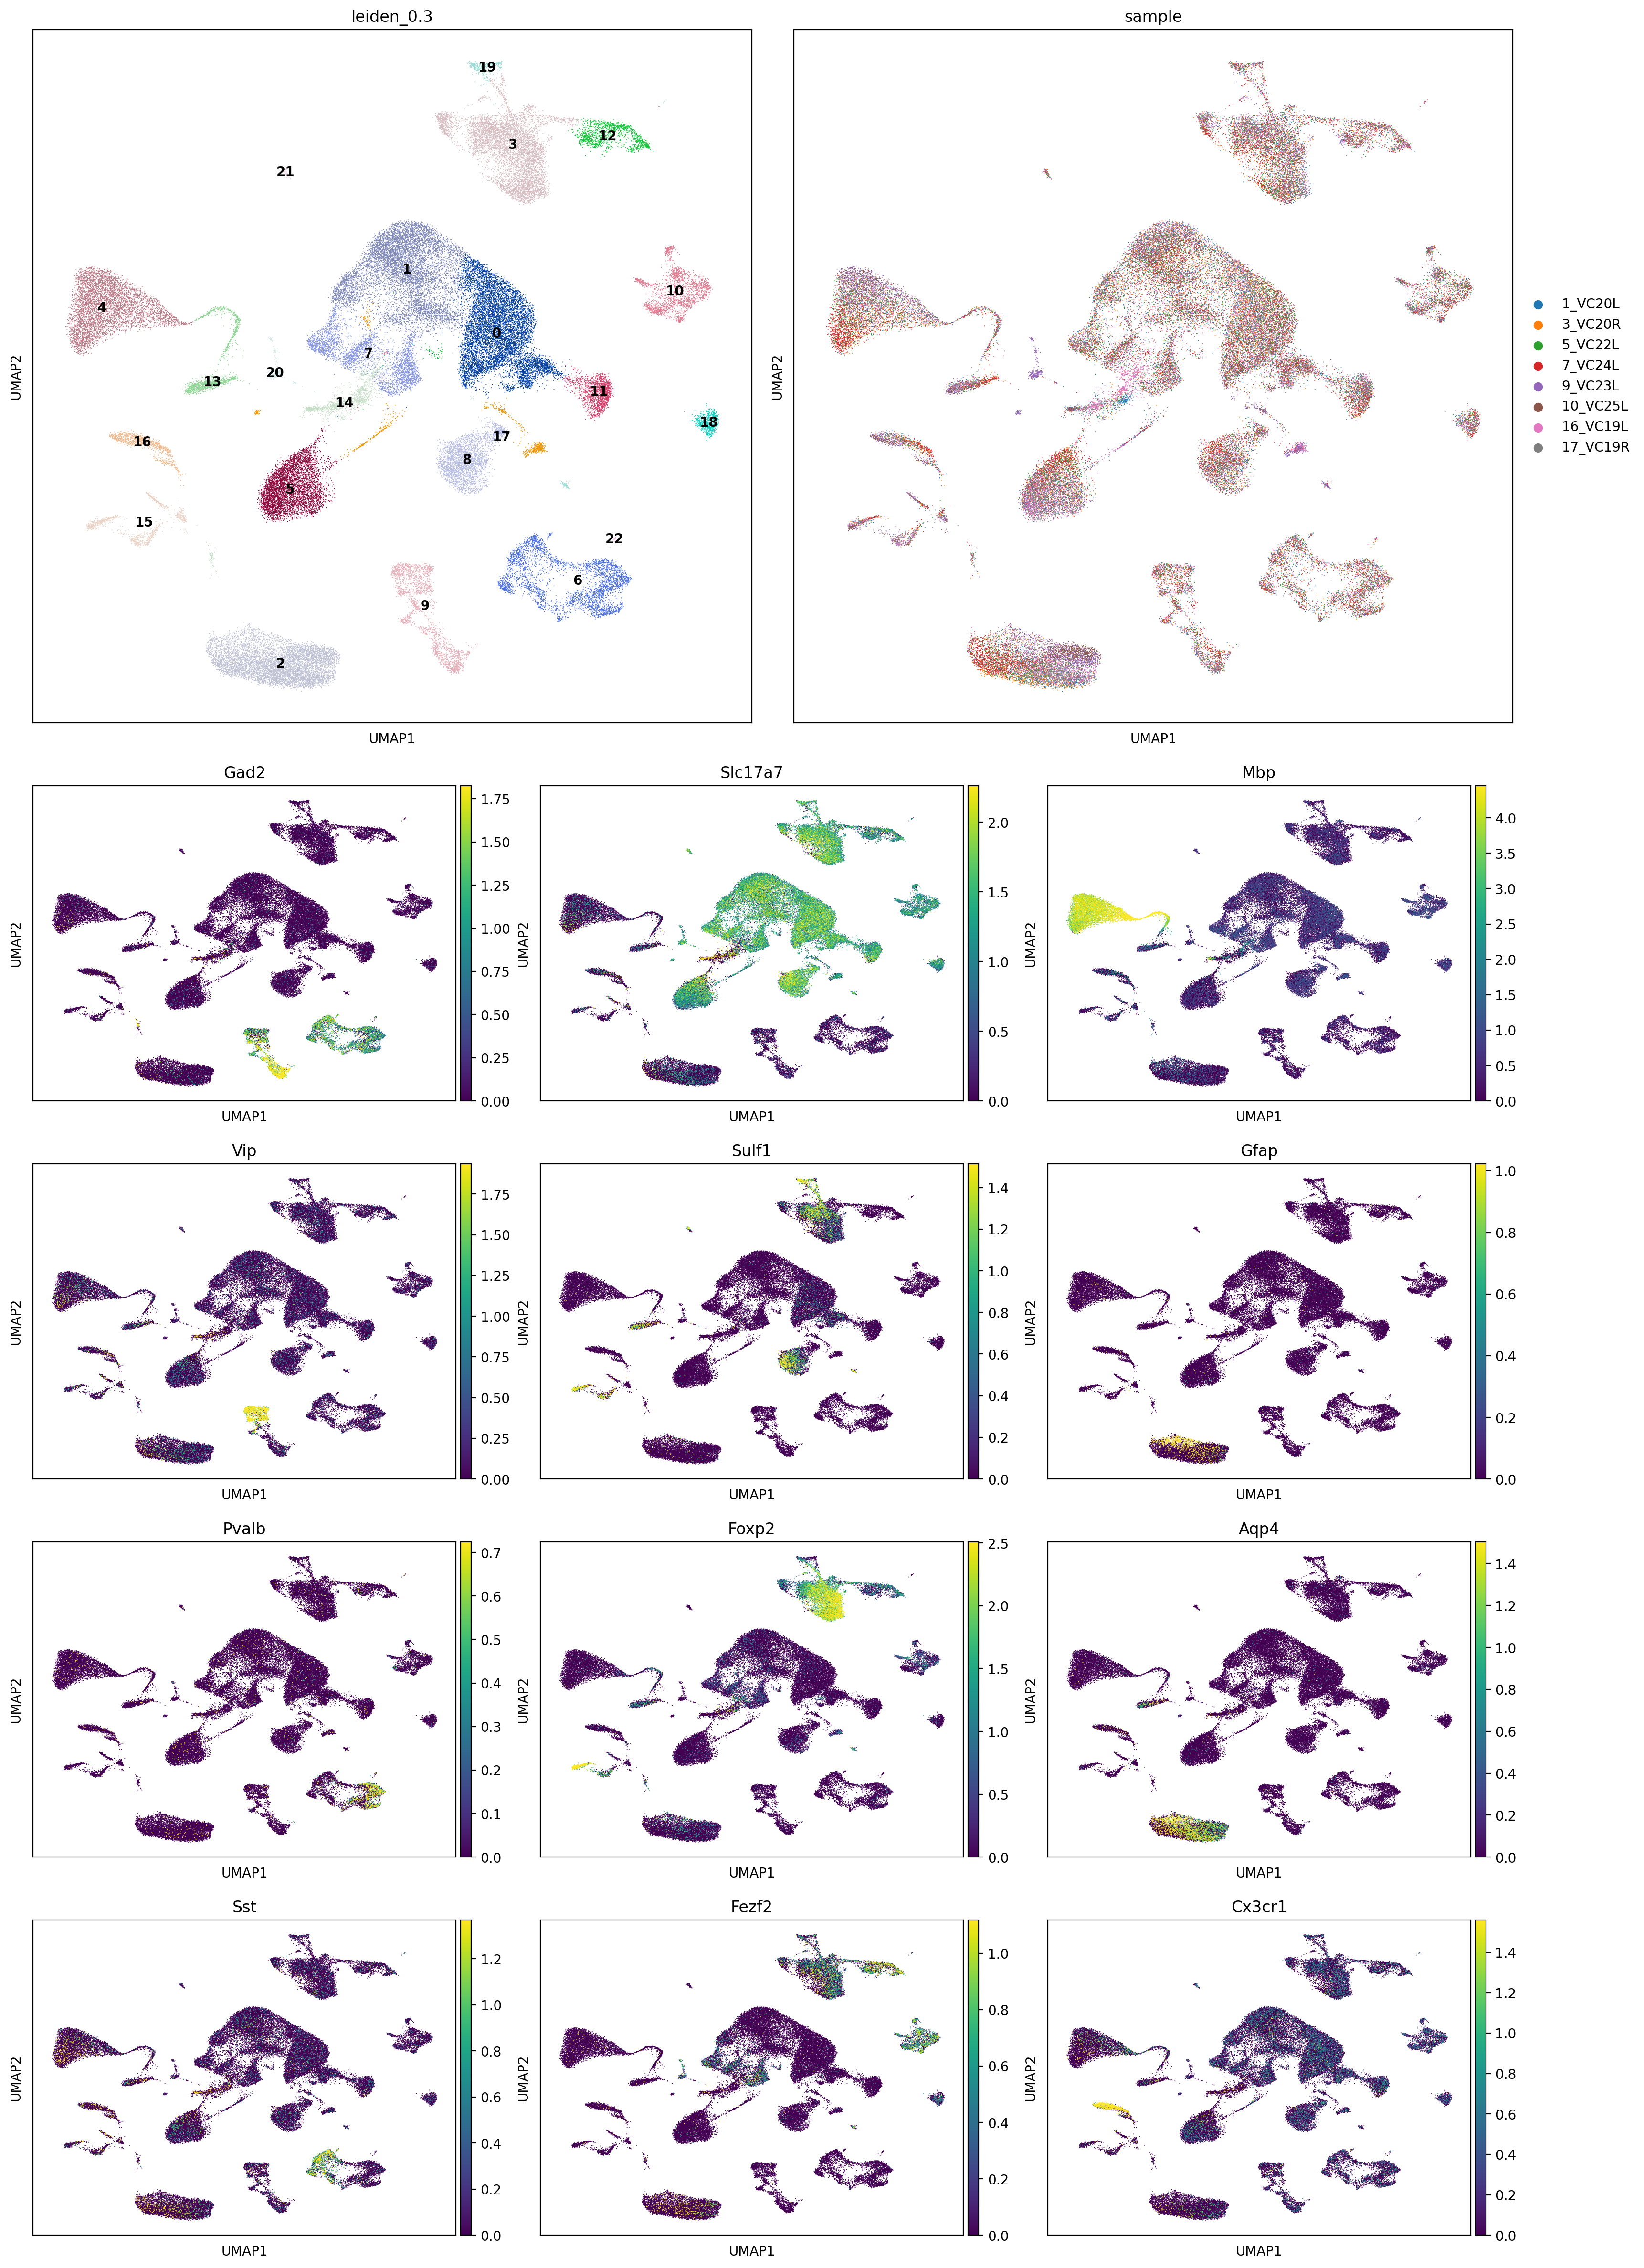

In [88]:
# Create a figure with subplots
fig = plt.figure(figsize=(20,30), dpi=200) #PLAY AROUND

row = 6 
col = 6

ax1 = plt.subplot2grid((row, col), (0, 0), colspan=3, rowspan=2) # Clustered UMAP Seperated by Sex

ax2 = plt.subplot2grid((row, col), (0, 3), colspan=3, rowspan=2) # Fold Change vs. DE Scatter Plot

ax3 = plt.subplot2grid((row, col), (2, 0), colspan=2) # DE Genes Male
ax4 = plt.subplot2grid((row, col), (3, 0), colspan=2) # DE Genes Female
ax5 = plt.subplot2grid((row, col), (4, 0), colspan=2)
ax6 = plt.subplot2grid((row, col), (5, 0), colspan=2) 

ax7 = plt.subplot2grid((row, col), (2, 2), colspan=2) # DE Genes Male
ax8 = plt.subplot2grid((row, col), (3, 2), colspan=2) # DE Genes Female
ax9 = plt.subplot2grid((row, col), (4, 2), colspan=2)
ax10 = plt.subplot2grid((row, col), (5, 2), colspan=2) 

ax11 = plt.subplot2grid((row, col), (2, 4), colspan=2) # DE Genes Male
ax12 = plt.subplot2grid((row, col), (3, 4), colspan=2) # DE Genes Female
ax13 = plt.subplot2grid((row, col), (4, 4), colspan=2)
ax14 = plt.subplot2grid((row, col), (5, 4), colspan=2) 

sc.pl.umap(sampleObj, color ='leiden_0.3', legend_loc='on data', show = False, ax=ax1)
sc.pl.umap(sampleObj, color = 'sample', legend_loc='right margin', show = False, ax=ax2)

sc.pl.umap(sampleObj, color ='Gad2', vmax='p99', show = False, ax=ax3)
sc.pl.umap(sampleObj, color = 'Vip', vmax='p99', show = False, ax=ax4)
sc.pl.umap(sampleObj, color = 'Pvalb', vmax='p99', show = False, ax=ax5)
sc.pl.umap(sampleObj, color = 'Sst', vmax='p99', show = False, ax=ax6)

sc.pl.umap(sampleObj, color = 'Slc17a7', vmax='p99', show = False, ax=ax7)
sc.pl.umap(sampleObj, color = 'Sulf1', vmax='p99', show = False, ax=ax8)
sc.pl.umap(sampleObj, color = 'Foxp2', vmax='p99', show = False, ax=ax9)
sc.pl.umap(sampleObj, color = 'Fezf2', vmax='p99', show = False, ax=ax10)

sc.pl.umap(sampleObj, color = 'Mbp', vmax='p99', show = False, ax=ax11)
sc.pl.umap(sampleObj, color = 'Gfap', vmax='p99', show = False, ax=ax12)
sc.pl.umap(sampleObj, color = 'Aqp4', vmax='p99', show = False, ax=ax13)
sc.pl.umap(sampleObj, color = 'Cx3cr1', vmax='p99', show = False, ax=ax14)

plt.savefig("C:/Users/Hlab/Desktop/BenFig.svg")